<a href="https://colab.research.google.com/github/selamtigistu1/MachineLearning/blob/main/3_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

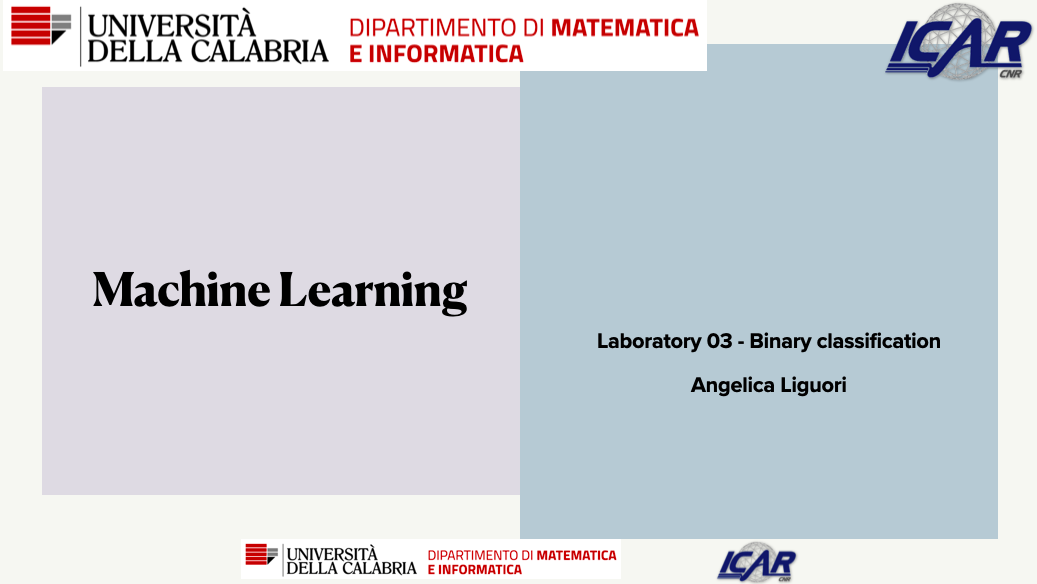

# **Developing with Keras**

* In neural networks the fundamental data structure is the layer that takes as input one or more tensors and produces one or more tensors as output

* Different layers are appropriate for different tensor formats
  * For example, simple vector data, stored in 2D tensors is often processed by fully connected layers (the Dense class in Keras)
  * Sequence data, stored in 3D tensors is typically processed by recurrent layers and image data, stored in 4D tensors is processed by convolution layers

* Building deep learning models in Keras is done by clipping together compatible layers (that means that every layer will only accept input tensors of a certain shape and will return output tensors of a certain shape)

* Consider:



```
from tensorflow.keras import layers

layer = layers.Dense(units, input_shape = (num_features, ))
```

* It is a Dense layer with a number of output equals to units

* It is a layer that will only accept as input 2D tensors where the second dimension (axis 1) is *num_features*

* The first dimension (axis 0) - the batch dimension - is unspecified and thus any value would be accepted.

* The layer will return a tensor where the axis 1 has been transformed to be "units"

* Thus this layer can only be connected to a layer that accepts units-dimensional vectors as its input




* The typical Keras workflow is:
  * Define training data: input tensors and target tensors
  * Define a model that maps inputs to targets
  * Configure the learning process by choosing a loss function, an optimizer and some metrics to monitor
  * Iterate on training data by calling the *fit()* method of the model

* To define a model, we can use the *Sequential* class that groups a linear stack of layers into a *tensorflow.keras.models*
    * each layer is added to the model



```
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
# add layers to the model
model.add(layers.Input(shape=(...)))
model.add(layers.Dense())
...
```

* The learning process is configured in the compilation step (by using the *compile()* method) where we specify the optimizer, the loss function and the metrics that we want to monitor during training

* Finally, the learning process consists of passing input data and the corresponding target data to the model via the *fit()* method

# **Binary classification**

* Classification refers to a predictive modeling problem where a class label is predicted for a given example of input data

* In the binary classification there are two class labels and the goal is to classify the elements into two groups

* In this example, we will learn to classify movies reviews as positive or negative, based on the text content of the reviews.

* This is a binary classification task in which the class labels are positive (1) and negative (0).

* We will use the IMDB dataset that is a set of 50000 highly polarized reviews from the Internet Movie Database.

* 25000 reviews are used for training and the rest for testing
  * Each set consisting of 50 % negative and 50% positive reviews

* Dataset come packaged with Keras and it has already been preprocessed

* The reviews, that are sequences of words, have been turned into a sequences of integers where each integer stands for a specific word in a dictionary
  * For convenience, words are indexed by overall frequency in the set
  * For example, the integer "2" encodes the second most frequent word in the data

* The goal is to build a classifier to predict whether the review is positive or negative

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb

import numpy as np

* To load the dataset we can use the following code:

In [ ]:
LIMIT_WORD = 10000 # we'll only keep the top 10000 most frequently occuring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = LIMIT_WORD)

17465344/17464789 [==============================] - 1s 0us/step


In [ ]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

* Since we have specified as the limit of words 10000, no word index will exceed that value. In fact:

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
max([max(sequence) for sequence in test_data])

print ("hi")
# for sequence in test_data:
  # for i, k in enumerate (sequence):
    # print (i,", ", k)

hi


It is possible decode one of these reviews back to English words by using:

In [ ]:
def convert_to_english(sequence):
  # word_index is a dictionary that map words to an integer index
  word_index = imdb.get_word_index()

  # mapping the integer indeces to words
  reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

  # Decodes the review
  # Note that the indices are offset by 3 because 0, 1, and 2 are reserved
  # indices for “padding,” “start of sequence,” and “unknown.”
  # These are replaced with a ?

  decode_review = ' '.join([reverse_word_index.get(i-3, '?') for i in sequence])

  return decode_review

In [ ]:
word_index = imdb.get_word_index()

i = 0
for k in word_index.keys():
  if i > 10:
    break
  print(k, ': ', word_index[k])
  i += 1

1646592/1641221 [==============================] - 0s 0us/step
fawn :  34701
tsukino :  52006
nunnery :  52007
sonja :  16816
vani :  63951
woods :  1408
spiders :  16115
hanging :  2345
woody :  2289
trawling :  52008
hold's :  52009


In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

i = 0
for k in sorted(reverse_word_index.keys()):
  if i > 10:
    break

  print(k, ': ', reverse_word_index[k])
  i += 1

1 :  the
2 :  and
3 :  a
4 :  of
5 :  to
6 :  is
7 :  br
8 :  in
9 :  it
10 :  i
11 :  this


In [ ]:
convert_to_english(train_data[0])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

* Since we can't feed lists of integers into a neural network, we have to turn lists into tensors. 
  * This step is called *data vectorization*
* One way is to use *one hot encoding*
  * One-hot encode lists to turn them into vectors of zeros and ones.
  * For instance, the sequence [2, 3] is turned into a 10000 dimensional vector that would be all zeros except for indices 2 and 3, which would be zeros.


In [ ]:
# Encoding the integer sequences into a binary matrix

def vectorize_sequences(sequences, dimension = 10000):
  # creates an all-zero matrix of shape (len(sequences), dimension)
  results = np.zeros((len(sequences), dimension))
  # print(results.shape)
  for i, sequence in enumerate(sequences):
    # print (i," ", len(sequence))
    results[i, sequence] = 1 
    # break;
  # print (results)

  return results

In [ ]:


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
# b=[]
# for a in x_train:
#   b.append(a)
#   # if train[i]==1:
#     # j=j+1
# for i in b:
#     print (i.tolist)

* We will also transform the targets into floats

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
# j=[]
# for i,b in enumerate(y_train):
#   if b==1:
#       j.append(i)
# print (len(j))

12500


* Now the data is ready to be fed into a neural network, so let's create the network

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [ ]:
num_features = x_train.shape[1]
print(num_features)
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', 
                       input_shape = (num_features, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

10000


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


* To compute the number of parameters for a layer

* For the first layer the number of parameters is:

In [ ]:
num_features * 16 + 16

160016

In [ ]:
# We can pass optimizer, loss function and metrics as strings because
# these are packaged as part of Keras
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
#model.compile(optimizer = tensorflow.keras.optimizers.RMSprop(lr=1e-4)) by default,the learning rate of RMSprop is 0.001

* In order to monitor during training the accuracy of the model on data it has never seen before, we'll create a validation set by setting apart 10000 samples from the original trainig data

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

* Now, we'll train the model for a number of epochs in mini-batches of samples (the first dimension that we did not specify in the input shape)

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20,
                    batch_size = 512, validation_data = (x_val, y_val),
                    verbose = 2)

Epoch 1/20
30/30 - 1s - loss: 0.5091 - accuracy: 0.7845 - val_loss: 0.3801 - val_accuracy: 0.8689
Epoch 2/20
30/30 - 0s - loss: 0.3016 - accuracy: 0.9029 - val_loss: 0.3104 - val_accuracy: 0.8832
Epoch 3/20
30/30 - 1s - loss: 0.2247 - accuracy: 0.9270 - val_loss: 0.2815 - val_accuracy: 0.8915
Epoch 4/20
30/30 - 0s - loss: 0.1774 - accuracy: 0.9427 - val_loss: 0.2748 - val_accuracy: 0.8900
Epoch 5/20
30/30 - 0s - loss: 0.1448 - accuracy: 0.9555 - val_loss: 0.2774 - val_accuracy: 0.8890
Epoch 6/20
30/30 - 0s - loss: 0.1211 - accuracy: 0.9641 - val_loss: 0.2877 - val_accuracy: 0.8873
Epoch 7/20
30/30 - 0s - loss: 0.0973 - accuracy: 0.9725 - val_loss: 0.3357 - val_accuracy: 0.8782
Epoch 8/20
30/30 - 1s - loss: 0.0785 - accuracy: 0.9789 - val_loss: 0.3209 - val_accuracy: 0.8834
Epoch 9/20
30/30 - 0s - loss: 0.0628 - accuracy: 0.9844 - val_loss: 0.3657 - val_accuracy: 0.8761
Epoch 10/20
30/30 - 0s - loss: 0.0510 - accuracy: 0.9877 - val_loss: 0.3711 - val_accuracy: 0.8798
Epoch 11/20
30/30 -

* The history is an object that contains a member *history*:
  * a dictionary containing data about everything that happened during training

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
import matplotlib.pyplot as plt

range(1, 21)


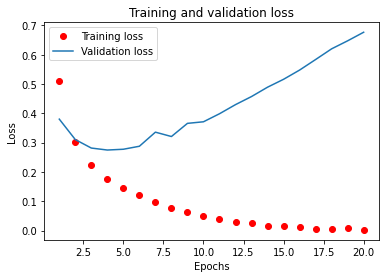

In [ ]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss)+1)
print (epochs)

plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

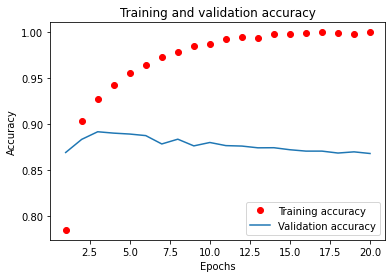

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'ro', label = 'Training accuracy')
plt.plot(epochs, val_acc, label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

* The training loss decreases with every epoch and the training accuracy increases with every epoch

* In fact, we want to minimize the loss so this should be less with every iteration

* But that is not the case for the validation loss
  * After the fourth epoch it starts to increase

* This means that a model that performs better on the training data isn't necessarily a model that will do better on data it has never seen before

* In this case we speak of *overfitting*: the model learns representantions that are specific to the training data and doesn't generalize to data outside of the training set

* In this case, to prevent overfitting, we could stop training after three epochs

  * We train network from scratch for four epochs and the evaluate it on the test data

In [ ]:
history = model.fit(x_train, y_train, epochs = 4, batch_size = 512)

Epoch 1/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2295 - accuracy: 0.9469
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.1364 - accuracy: 0.9602
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.1063 - accuracy: 0.9682
Epoch 4/4
49/49 [==============================] - 1s 27ms/step - loss: 0.0857 - accuracy: 0.9738


In [ ]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.7336 - accuracy: 0.8531


In [ ]:
results

[0.7335598468780518, 0.8530799746513367]

* After having trained a network, we can generate the likelihood of reviews begin positive by using the predict method

In [ ]:
model.predict(x_test)

array([[4.6001673e-03],
       [9.9999988e-01],
       [9.9974185e-01],
       ...,
       [7.2957948e-04],
       [2.0026455e-02],
       [8.3835131e-01]], dtype=float32)

In [ ]:
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

* In general, we can use several techniques to mitigate overfitting

* The simplest way to prevent overfitting is to reduce the network's size, i. e. the number of learnable parameters in the model)

In [ ]:
num_features = x_train.shape[1]
model = models.Sequential()
model.add(layers.Dense(4, activation = 'relu', 
                       input_shape = (num_features, )))
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20,
                    batch_size = 512, validation_data = (x_val, y_val),
                    verbose = 2)

Epoch 1/20
30/30 - 1s - loss: 0.6326 - accuracy: 0.6585 - val_loss: 0.5765 - val_accuracy: 0.7450
Epoch 2/20
30/30 - 1s - loss: 0.5349 - accuracy: 0.7961 - val_loss: 0.5319 - val_accuracy: 0.7765
Epoch 3/20
30/30 - 0s - loss: 0.4872 - accuracy: 0.8483 - val_loss: 0.5040 - val_accuracy: 0.8656
Epoch 4/20
30/30 - 0s - loss: 0.4539 - accuracy: 0.8820 - val_loss: 0.4837 - val_accuracy: 0.8490
Epoch 5/20
30/30 - 0s - loss: 0.4278 - accuracy: 0.8995 - val_loss: 0.4665 - val_accuracy: 0.8632
Epoch 6/20
30/30 - 1s - loss: 0.3943 - accuracy: 0.9239 - val_loss: 0.4823 - val_accuracy: 0.8449
Epoch 7/20
30/30 - 0s - loss: 0.3709 - accuracy: 0.9413 - val_loss: 0.4580 - val_accuracy: 0.8716
Epoch 8/20
30/30 - 0s - loss: 0.3537 - accuracy: 0.9516 - val_loss: 0.4851 - val_accuracy: 0.8521
Epoch 9/20
30/30 - 0s - loss: 0.3405 - accuracy: 0.9576 - val_loss: 0.4553 - val_accuracy: 0.8743
Epoch 10/20
30/30 - 0s - loss: 0.3282 - accuracy: 0.9639 - val_loss: 0.4682 - val_accuracy: 0.8675
Epoch 11/20
30/30 -

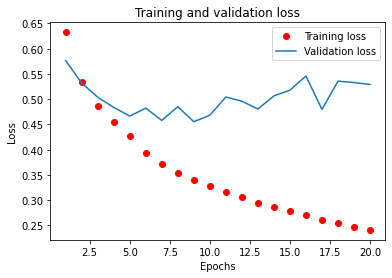

In [ ]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

* What happens if we increase the number of parameters?

In [ ]:
num_features = x_train.shape[1]
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', 
                       input_shape = (num_features, )))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 644,289
Trainable params: 644,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20,
                    batch_size = 512, validation_data = (x_val, y_val),
                    verbose = 1)

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4850 - accuracy: 0.7657 - val_loss: 0.3241 - val_accuracy: 0.8798
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2532 - accuracy: 0.9077 - val_loss: 0.3061 - val_accuracy: 0.8728
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1849 - accuracy: 0.9325 - val_loss: 0.2830 - val_accuracy: 0.8874
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1441 - accuracy: 0.9466 - val_loss: 0.3644 - val_accuracy: 0.8613
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1006 - accuracy: 0.9641 - val_loss: 0.3240 - val_accuracy: 0.8804
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0714 - accuracy: 0.9771 - val_loss: 0.3880 - val_accuracy: 0.8695
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0570 - accuracy: 0.9819 - val_loss: 0.3948 - val_accuracy: 0.8807
Epoch 8/20
30

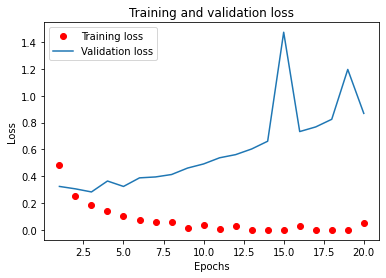

In [ ]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

* Another way is to adding dropout layer. This technique consists in setting to 0 a random ratio of features of an activation matrix at training time. Adding noise can contribute to break up the learning of irrelevant patterns.

In [ ]:
num_features = x_train.shape[1]
model = models.Sequential()
model.add(layers.Dense(8, activation = 'relu', 
                       input_shape = (num_features, )))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(8, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20,
                    batch_size = 512, validation_data = (x_val, y_val),
                    verbose = 2)

Epoch 1/20
30/30 - 1s - loss: 0.6237 - accuracy: 0.6579 - val_loss: 0.5576 - val_accuracy: 0.7575
Epoch 2/20
30/30 - 1s - loss: 0.5322 - accuracy: 0.8067 - val_loss: 0.5107 - val_accuracy: 0.8460
Epoch 3/20
30/30 - 0s - loss: 0.4799 - accuracy: 0.8675 - val_loss: 0.4779 - val_accuracy: 0.8499
Epoch 4/20
30/30 - 0s - loss: 0.4426 - accuracy: 0.8991 - val_loss: 0.4605 - val_accuracy: 0.8613
Epoch 5/20
30/30 - 0s - loss: 0.4088 - accuracy: 0.9206 - val_loss: 0.4504 - val_accuracy: 0.8680
Epoch 6/20
30/30 - 0s - loss: 0.3827 - accuracy: 0.9336 - val_loss: 0.4386 - val_accuracy: 0.8764
Epoch 7/20
30/30 - 1s - loss: 0.3566 - accuracy: 0.9441 - val_loss: 0.4614 - val_accuracy: 0.8619
Epoch 8/20
30/30 - 0s - loss: 0.3288 - accuracy: 0.9524 - val_loss: 0.4252 - val_accuracy: 0.8777
Epoch 9/20
30/30 - 0s - loss: 0.2964 - accuracy: 0.9549 - val_loss: 0.4367 - val_accuracy: 0.8741
Epoch 10/20
30/30 - 0s - loss: 0.2640 - accuracy: 0.9567 - val_loss: 0.4115 - val_accuracy: 0.8772
Epoch 11/20
30/30 -

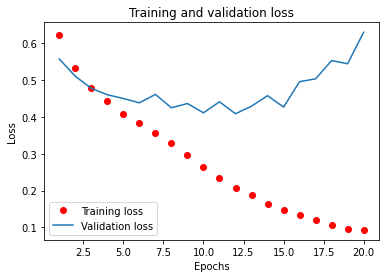

In [ ]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()